In [1]:
import dgl
import numpy as np
import pickle
import matplotlib.pyplot as plt
import torch

In [2]:
pickle_name = 'domain_dataset.pickle'
with open(pickle_name, 'rb') as f:
    dataset = pickle.load(f)


In [3]:
def plot_histogram(title, data, labels, axis_labels=None):
    plt.figure()
    plt.title(f'Histogram of {title}')
    for d, l in zip(data, labels):
        plt.hist(d, label=l, alpha=.7)
    if axis_labels is not None:
        plt.xlabel(axis_labels[0])
        plt.ylabel(axis_labels[1])
    plt.legend()
    plt.show()

In [4]:
normal_nodes = np.asarray([d.num_nodes() for d, cl in dataset if cl == 0])
normal_edges = np.asarray([d.num_edges() for d, cl in dataset if cl == 0])
propaganda_nodes = np.asarray([d.num_nodes() for d, cl in dataset if cl == 1])
propaganda_edges = np.asarray([d.num_edges() for d, cl in dataset if cl == 1])

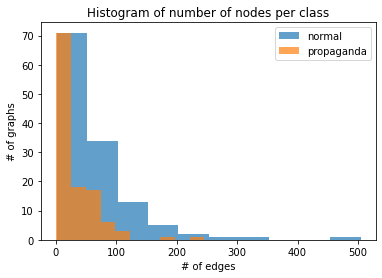

In [5]:
plot_histogram('number of nodes per class', [normal_nodes, propaganda_nodes], ['normal', 'propaganda'], ['# of edges', '# of graphs'])

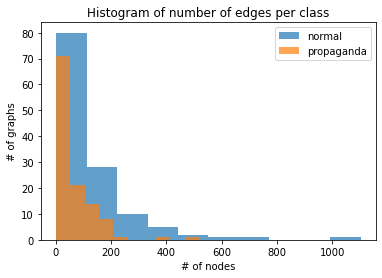

In [6]:
plot_histogram('number of edges per class', [normal_edges, propaganda_edges], ['normal', 'propaganda'], ['# of nodes', '# of graphs'])

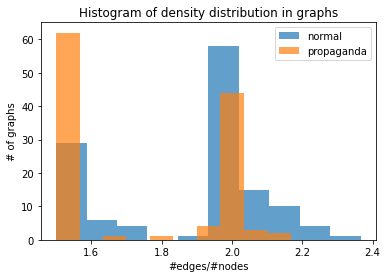

In [7]:
normal_density = normal_edges/normal_nodes
propaganda_density = propaganda_edges/propaganda_nodes
plot_histogram('density distribution in graphs', [normal_density, propaganda_density], ['normal', 'propaganda'], ['#edges/#nodes', '# of graphs'])

'node_fv' is feature vector of node, it consists of [degree centrality, betweenness centrality, eigenvector centrality, clustering coefficient)]

In [8]:
normal_node_fv = np.vstack([graph.ndata['node_fv'].numpy() for graph, label in dataset if label == 0])
propaganda_node_fv = np.vstack([graph.ndata['node_fv'].numpy() for graph, label in dataset if label == 1])
norm_degree, norm_betweenness, norm_eig, norm_clust = normal_node_fv.T
prop_degree, prop_betweenness, prop_eig, prop_clust = propaganda_node_fv.T

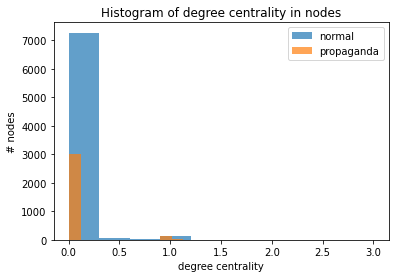

In [9]:
plot_histogram('degree centrality in nodes', [norm_degree, prop_degree], ['normal', 'propaganda'], ['degree centrality', '# nodes'])

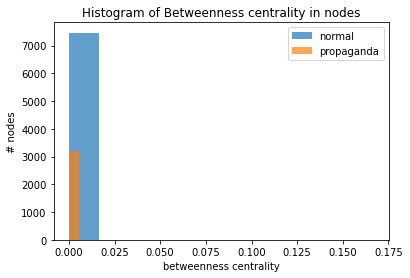

In [10]:
plot_histogram('Betweenness centrality in nodes', [norm_betweenness, prop_betweenness], ['normal', 'propaganda'], ['betweenness centrality', '# nodes'])

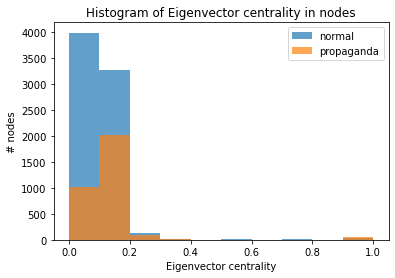

In [11]:
plot_histogram('Eigenvector centrality in nodes', [norm_eig, prop_eig], ['normal', 'propaganda'], ['Eigenvector centrality', '# nodes'])

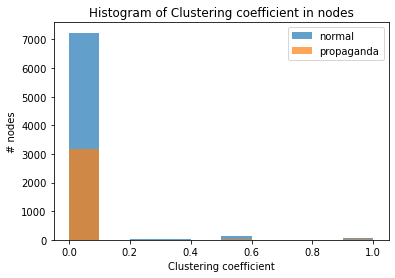

In [12]:
plot_histogram('Clustering coefficient in nodes', [norm_clust, prop_clust], ['normal', 'propaganda'], ['Clustering coefficient', '# nodes'])

In [13]:
mean_normal_node = normal_node_fv.mean(0)
mean_propaganda_node = propaganda_node_fv.mean(0)
print("mean node feature vectors (normal, propaganda):\n", mean_normal_node, mean_propaganda_node)

mean node feature vectors (normal, propaganda):
 [3.6189374e-02 9.8860495e-05 9.1324024e-02 1.9196998e-02] [7.3505342e-02 7.1002818e-05 1.3506484e-01 9.2307320e-03]


In [14]:
all_cov = np.cov(np.vstack((normal_node_fv, propaganda_node_fv)).T)
print("Cov matrix for all nodes")
print(all_cov)

Cov matrix for all nodes
[[ 3.05588604e-02  5.32193997e-05  8.14391879e-03 -4.81066493e-04]
 [ 5.32193997e-05  3.96017073e-06 -1.03763027e-06 -1.03244034e-06]
 [ 8.14391879e-03 -1.03763027e-06  1.20185061e-02  4.02766915e-04]
 [-4.81066493e-04 -1.03244034e-06  4.02766915e-04  1.15817563e-02]]


In [15]:
normal_cov = np.cov(normal_node_fv.T)
print("Cov matrix for nodes in normal graphs")
print(normal_cov)

Cov matrix for nodes in normal graphs
[[ 2.13095237e-02  5.35372085e-05  4.94988409e-03 -3.71524889e-04]
 [ 5.35372085e-05  4.66338059e-06 -4.97178119e-07 -1.31483300e-06]
 [ 4.94988409e-03 -4.97178119e-07  8.78939338e-03  6.36028714e-04]
 [-3.71524889e-04 -1.31483300e-06  6.36028714e-04  1.31859610e-02]]


In [16]:
propaganda_cov = np.cov(propaganda_node_fv.T)
print("Cov matrix for nodes in propaganda graphs")
print(propaganda_cov)

Cov matrix for nodes in propaganda graphs
[[ 5.11240351e-02  5.32235380e-05  1.44392389e-02 -4.75991970e-04]
 [ 5.32235380e-05  2.32398166e-06 -1.44338573e-06 -5.69685089e-07]
 [ 1.44392389e-02 -1.44338573e-06  1.81999999e-02  1.64943177e-04]
 [-4.75991970e-04 -5.69685089e-07  1.64943177e-04  7.78171936e-03]]
